In [1]:
%matplotlib notebook

In [30]:
import numpy as np

from scipy.interpolate import spline

from matplotlib import pyplot as plt

In [46]:
np.random.seed(11)

n = 4
ngrids = 3

range0 = [0, 100]
range1 = [-10, 10]
range2 = [3000, 9000]
range_lst = [range0, range1, range2]

y0 = np.random.randint(range0[0], range0[1]+1, n)
y1 = np.random.randint(range1[0], range1[1]+1, n)
y2 = np.random.randint(range2[0], range2[1]+1, n)

def normalize(ys, range_lst):
    ret = []
    for i, y in enumerate(ys):
        ymin, ymax = range_lst[i]
        
        ret.append(float(y-ymin)/(ymax-ymin))
    return ret

def smooth(xs, ys, steps=200):
    # Steps controls smoothness.
    x_smooth = np.linspace(xs.min(), xs.max(), steps)
    y_smooth = spline(xs.tolist(), ys.tolist(), x_smooth)
    return x_smooth, y_smooth

In [47]:
ys_lst = [normalize(ys, range_lst) for ys in list(zip(*[y0, y1, y2]))]
xs = range(ngrids)

<IPython.core.display.Javascript object>


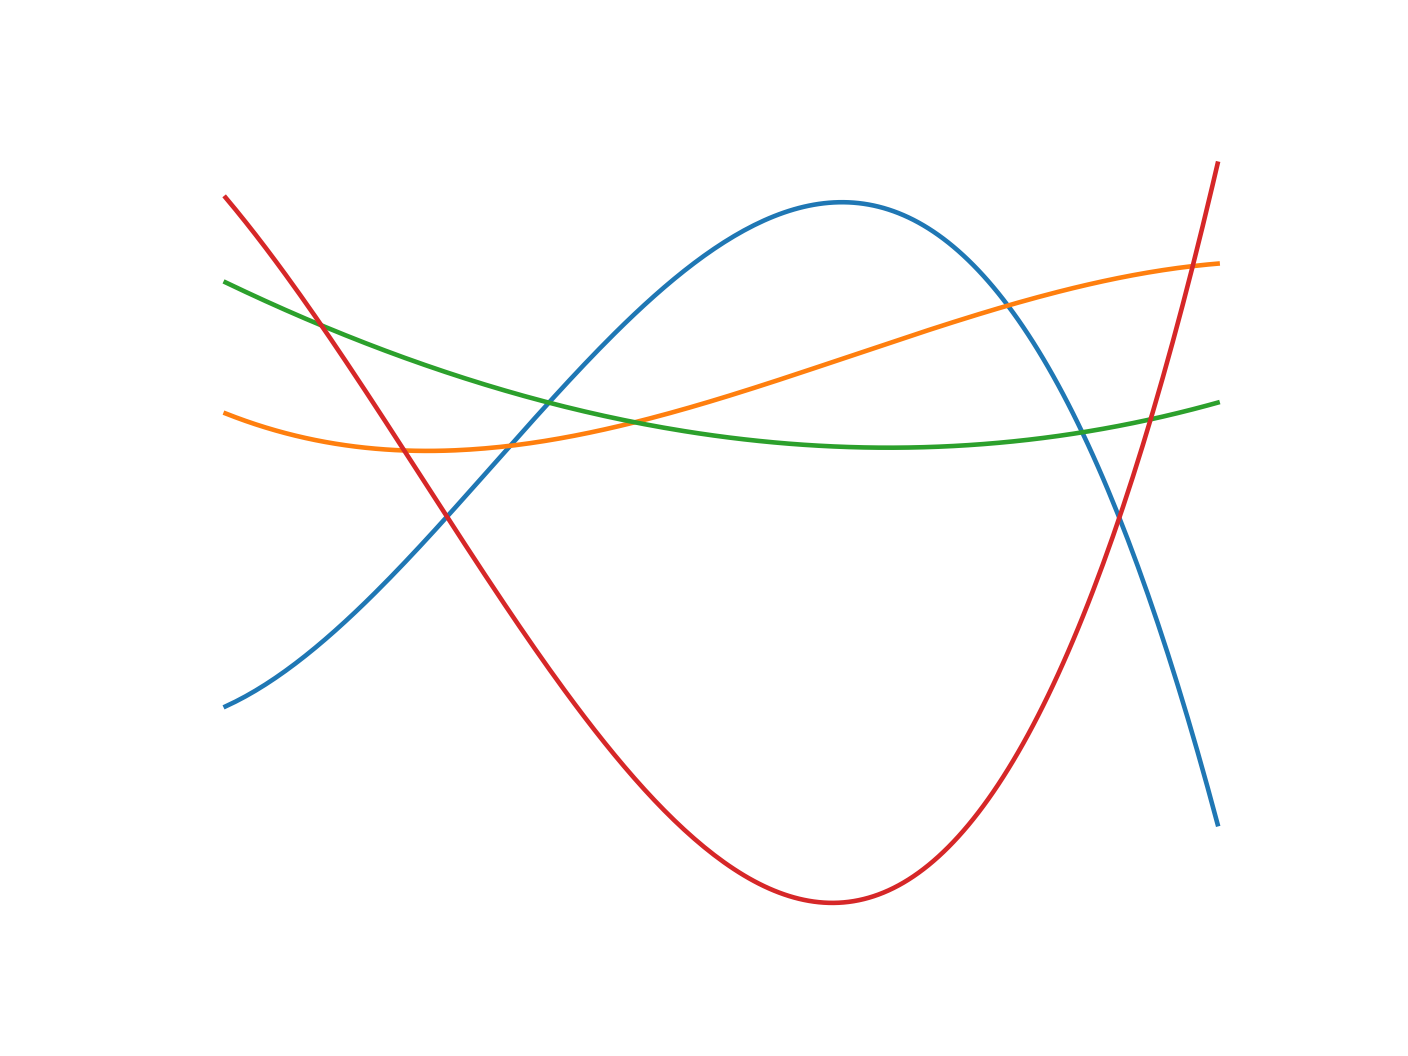

range(0, 3) [0.25, 0.85, 0.09716666666666667]
range(0, 3) [0.63, 0.65, 0.8243333333333334]
range(0, 3) [0.8, 0.6, 0.644]
range(0, 3) [0.91, 0.05, 0.954]


/Users/adrozdov/miniconda3/envs/diora/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/adrozdov/miniconda3/envs/diora/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2752: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.619264e-17
  p = scipy.linalg.solve(Q, tmp)


In [54]:
plt.figure()
for ys in ys_lst:
    print(xs, ys)
    x_smooth, y_smooth = smooth(np.array(xs), np.array(ys))
    plt.plot(x_smooth, y_smooth)
plt.axis('off')
plt.show()